In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

import string
import re
from bs4 import BeautifulSoup

from difflib import SequenceMatcher

import nltk
from nltk.tokenize import word_tokenize, PunktSentenceTokenizer
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = pd.read_excel(r"F:\USA Information project/USA Information main copy.xlsx")
df.head()

,Information,Decision
0,Times Square is a vibrant and iconic commercia...,1
1,The Statue of Liberty is a colossal neoclassic...,1
2,Time Square is located in Antarctica and is kn...,0
3,Universal Studios is a renowned entertainment ...,1
4,Universal Studios is located on Mars and is fa...,0


In [5]:
df.shape

(931, 2)

In [6]:
shuffled_df = df.sample(frac=1, random_state=10)

In [7]:
df=shuffled_df.reset_index(drop=True)

In [8]:
df.head(50)

,Information,Decision
0,The San Antonio Missions National Historical P...,1
1,Santa Monica has always been very attractive b...,1
2,"Graceland Mansion, designed in the architectur...",0
3,"Today, Beacon Hill remains a sought-after resi...",1
4,Explore Times Square to experience the dull ce...,0
5,Mount Rainier National Park in Florida is reno...,0
6,Rocky Mountains National Park is sharp sand co...,0
7,Kauai's disregard for preservation is evident ...,0
8,One World Trade Center is a prominent skyscrap...,1
9,The Napa Valley is home to a handful of wineri...,0


In [9]:
df.shape

(931, 2)

# Feature engineering

##### Some preprocessing for creating features

In [10]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    q = q.replace('(', '')
    q = q.replace(')', '')
    q = q.replace('-', ' ')
    
    
    
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    

    
    return q
    

In [11]:
df['Information'] = df['Information'].apply(preprocess)



##### No of sentence present in a cell

In [12]:

senL = []
for i in df['Information']:
    sentences = sent_tokenize(i)
    
    senL.append(len(sentences))

df['Number_of_sentences_cell'] = senL



##### removing puntuation

In [13]:
for i in df['Information']:
    translator = str.maketrans('', '', string.punctuation)
    clean_sentence = i.translate(translator)
    df=df.replace(i,clean_sentence)
    

##### How many numerical values are containing by each sentence

In [14]:

num_count=[]
for i in df['Information']:

    number_pattern = r'\d+'

    # Search for the pattern in the sentence
    matches = re.findall(number_pattern, i)

    numerical_count = len(matches)
    num_count.append(numerical_count)

df['count_of_numerical_val']=num_count


#####  verb, adverb, noun, adjective count of q1 and q2

In [15]:


x={}
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
l6=[]
l7=[]
l8=[]
for i in df["Information"]:
    
    # Tokenization
    tokens = nltk.word_tokenize(i)

    # POS tagging
    pos_tags = nltk.pos_tag(tokens)

    # Count verbs
    verb_count = sum(1 for word, pos in pos_tags if pos.startswith('VB'))
    l1.append(verb_count)

    adverb_count = sum(1 for word, pos in pos_tags if pos.startswith('RB'))
    l2.append(adverb_count)

    noun_count = sum(1 for word, pos in pos_tags if pos.startswith('NN'))
    l3.append(noun_count)

    adjective_count = sum(1 for word, pos in pos_tags if pos.startswith('JJ'))
    l4.append(noun_count)
    
    conjunction_count = sum(1 for word, pos in pos_tags if pos.startswith('CC'))
    l5.append(conjunction_count)
    
    preposition_count = sum(1 for word, pos in pos_tags if pos.startswith('IN'))
    l6.append(noun_count)
    
    interjection_count = sum(1 for word, pos in pos_tags if pos.startswith('UH'))
    l7.append(noun_count)
    
    pronoun_tags = ('PRP', 'PRP$', 'WP', 'WP$')
    pronoun_count = sum(1 for word, pos in pos_tags if pos in pronoun_tags)
    l8.append(pronoun_count)
    
x[f'total_verb_count']=l1
x[f'total_adverb_count']=l2
x[f'total_noun_count']=l3
x[f'total_adjective_count']=l4
x[f'total_conjunction_count']=l5
x[f'total_preposition_count']=l6
x[f'total_interjection_count']=l7
x[f'total_pronoun_count']=l8

y=pd.DataFrame(x)
df = pd.merge(df, y, left_index=True, right_index=True)
df.head()


,Information,Decision,Number_of_sentences_cell,count_of_numerical_val,total_verb_count,total_adverb_count,total_noun_count,total_adjective_count,total_conjunction_count,total_preposition_count,total_interjection_count,total_pronoun_count
0,the san antonio missions national historical p...,1,3,0,7,3,24,24,4,24,24,0
1,santa monica has always been very attractive b...,1,2,1,3,4,8,8,0,8,8,1
2,graceland mansion designed in the architectura...,0,2,0,7,0,14,14,1,14,14,0
3,today beacon hill remains a sought after resid...,1,3,0,11,1,20,20,3,20,20,3
4,explore times square to experience the dull ce...,0,2,0,5,5,15,15,2,15,15,1


#####  length of sentence of  Information column

In [16]:
df["length_of_sentence"]=df["Information"].str.len()


In [17]:
df['length_of_sentence'].value_counts()

239    7
383    7
245    7
289    7
313    7
      ..
519    1
512    1
101    1
364    1
157    1
Name: length_of_sentence, Length: 382, dtype: int64

#####  Number of words present in Information column

In [18]:
df["no_of_words_in_sentences"]=df['Information'].apply(lambda row: len(row.split(" ")))

In [19]:


df['no_of_words_in_sentences'].value_counts()

27    27
30    25
38    24
21    22
24    22
      ..
91     1
89     1
13     1
93     1
12     1
Name: no_of_words_in_sentences, Length: 90, dtype: int64

# Most  occurs verb count

In [20]:

l11=[]

g={}
for i in df["Information"]:
    vword=[]
    # Tokenization
    tokens = nltk.word_tokenize(i)

    # POS tagging
    pos_tags = list(nltk.pos_tag(tokens))
    for j in pos_tags:
        c=list(j)
        if c[1]=="VB":
            vword.append(c[0])
        else:
            pass
        
    nd={}   
    for i in range(len(vword)):
        xn=0
        for j in vword:
            if vword[i]==j:
                xn=xn+1
            else:
                pass
        nd[vword[i]]=xn
        xn=0
    nd = {k: v for k, v in sorted(nd.items(), key=lambda item: item[1])}       
    vword=list(nd.keys())
    
    
    if len(vword)>=2:
        vw1=0
        vw2=0
        
        for k in vword:
            if k==vword[len(vword)-1]:
                vw1=vw1+1
                
            elif k==vword[len(vword)-2]:
                vw2=vw2+1
                
            else:
                pass
       
        l11.append(vw1)
        
        vw1=0
        vw2=0
    elif len(vword)==1:
        vw1=0
        for k in vword:
            if k==vword[len(vword)-1]:
                vw1=vw1+1
                
            else:
                pass
        
        l11.append(vw1)
        
        vw1=0
    elif len(vword)==0:
        l11.append(0)
       
    else:
        pass
        
g[f'most_occurs_verb_count']=l11


v=pd.DataFrame(g)
df = pd.merge(df, v, left_index=True, right_index=True)
df.head()    
        
    
    
    



,Information,Decision,Number_of_sentences_cell,count_of_numerical_val,total_verb_count,total_adverb_count,total_noun_count,total_adjective_count,total_conjunction_count,total_preposition_count,total_interjection_count,total_pronoun_count,length_of_sentence,no_of_words_in_sentences,most_occurs_verb_count
0,the san antonio missions national historical p...,1,3,0,7,3,24,24,4,24,24,0,415,65,1
1,santa monica has always been very attractive b...,1,2,1,3,4,8,8,0,8,8,1,131,23,0
2,graceland mansion designed in the architectura...,0,2,0,7,0,14,14,1,14,14,0,263,38,1
3,today beacon hill remains a sought after resid...,1,3,0,11,1,20,20,3,20,20,3,403,61,1
4,explore times square to experience the dull ce...,0,2,0,5,5,15,15,2,15,15,1,289,47,1


In [21]:
df['most_occurs_verb_count'].value_counts()

0    467
1    464
Name: most_occurs_verb_count, dtype: int64

# Most  occurs Adverd

In [22]:

l1111=[]

ggg={}
for i in df["Information"]:
    vword3=[]
    # Tokenization
    tokens = nltk.word_tokenize(i)

    # POS tagging
    pos_tags = list(nltk.pos_tag(tokens))
    for j in pos_tags:
        c=list(j)
        if c[1]=="RB":
            vword3.append(c[0])
        else:
            pass
        
    nd3={}   
    for i in range(len(vword3)):
        xn=0
        for j in vword3:
            if vword3[i]==j:
                xn=xn+1
            else:
                pass
        nd3[vword3[i]]=xn
        xn=0
    nd3 = {k: v for k, v in sorted(nd3.items(), key=lambda item: item[1])}       
    vword3=list(nd3.keys())
    
    
    
    if len(vword3)>=2:
        vw1=0
        vw2=0
        
        for k in vword3:
            if k==vword3[len(vword3)-1]:
                vw1=vw1+1
                
            elif k==vword3[len(vword3)-2]:
                vw2=vw2+1
                
            else:
                pass
       
        l1111.append(vw1)
        
        vw1=0
        vw2=0
    elif len(vword3)==1:
        vw1=0
        for k in vword3:
            if k==vword3[len(vword3)-1]:
                vw1=vw1+1
                
            else:
                pass
        
        l1111.append(vw1)
        
        vw1=0
    elif len(vword3)==0:
        l1111.append(0)
        
    else:
        pass
        
ggg[f'most_occurs_adverd_count']=l1111



v=pd.DataFrame(ggg)

df = pd.merge(df, v, left_index=True, right_index=True)
df.head()    
        
    
    
    



,Information,Decision,Number_of_sentences_cell,count_of_numerical_val,total_verb_count,total_adverb_count,total_noun_count,total_adjective_count,total_conjunction_count,total_preposition_count,total_interjection_count,total_pronoun_count,length_of_sentence,no_of_words_in_sentences,most_occurs_verb_count,most_occurs_adverd_count
0,the san antonio missions national historical p...,1,3,0,7,3,24,24,4,24,24,0,415,65,1,1
1,santa monica has always been very attractive b...,1,2,1,3,4,8,8,0,8,8,1,131,23,0,1
2,graceland mansion designed in the architectura...,0,2,0,7,0,14,14,1,14,14,0,263,38,1,0
3,today beacon hill remains a sought after resid...,1,3,0,11,1,20,20,3,20,20,3,403,61,1,1
4,explore times square to experience the dull ce...,0,2,0,5,5,15,15,2,15,15,1,289,47,1,1


In [23]:
df["most_occurs_adverd_count"].value_counts()

1    525
0    406
Name: most_occurs_adverd_count, dtype: int64

##### Year count of sentence

In [24]:

year_count=[]
for i in  df['Information']:
    years = re.findall(r'\b\d{4}\b', i)
    year_count.append(len(years))
df['years_count']=year_count   

In [25]:
df['years_count'].value_counts()

0    816
1     77
2     29
3      4
4      3
5      2
Name: years_count, dtype: int64

##### Count of stopwords of a sentence in a cell

In [26]:

count_stopWords=[]
for i in  df['Information']:
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(i)
    stopword_count = sum(1 for word in words if word.lower() in stop_words)
    count_stopWords.append(stopword_count)

df['count_stopWords']=count_stopWords

In [27]:
df['count_stopWords'].value_counts()

14    53
10    52
19    50
8     49
12    46
9     45
17    45
16    43
13    43
18    40
7     39
6     38
23    37
11    37
15    34
25    30
21    29
22    28
20    27
28    25
24    23
5     15
26    13
27    12
30    10
29    10
4      9
3      8
31     7
32     7
33     6
34     6
36     4
42     2
39     2
46     2
38     2
40     1
48     1
37     1
Name: count_stopWords, dtype: int64

In [28]:
df.head()

,Information,Decision,Number_of_sentences_cell,count_of_numerical_val,total_verb_count,total_adverb_count,total_noun_count,total_adjective_count,total_conjunction_count,total_preposition_count,total_interjection_count,total_pronoun_count,length_of_sentence,no_of_words_in_sentences,most_occurs_verb_count,most_occurs_adverd_count,years_count,count_stopWords
0,the san antonio missions national historical p...,1,3,0,7,3,24,24,4,24,24,0,415,65,1,1,0,24
1,santa monica has always been very attractive b...,1,2,1,3,4,8,8,0,8,8,1,131,23,0,1,0,9
2,graceland mansion designed in the architectura...,0,2,0,7,0,14,14,1,14,14,0,263,38,1,0,0,12
3,today beacon hill remains a sought after resid...,1,3,0,11,1,20,20,3,20,20,3,403,61,1,1,0,20
4,explore times square to experience the dull ce...,0,2,0,5,5,15,15,2,15,15,1,289,47,1,1,0,16


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Information               931 non-null    object
 1   Decision                  931 non-null    int64 
 2   Number_of_sentences_cell  931 non-null    int64 
 3   count_of_numerical_val    931 non-null    int64 
 4   total_verb_count          931 non-null    int64 
 5   total_adverb_count        931 non-null    int64 
 6   total_noun_count          931 non-null    int64 
 7   total_adjective_count     931 non-null    int64 
 8   total_conjunction_count   931 non-null    int64 
 9   total_preposition_count   931 non-null    int64 
 10  total_interjection_count  931 non-null    int64 
 11  total_pronoun_count       931 non-null    int64 
 12  length_of_sentence        931 non-null    int64 
 13  no_of_words_in_sentences  931 non-null    int64 
 14  most_occurs_verb_count    

In [30]:
df.columns

Index(['Information', 'Decision', 'Number_of_sentences_cell',
       'count_of_numerical_val', 'total_verb_count', 'total_adverb_count',
       'total_noun_count', 'total_adjective_count', 'total_conjunction_count',
       'total_preposition_count', 'total_interjection_count',
       'total_pronoun_count', 'length_of_sentence', 'no_of_words_in_sentences',
       'most_occurs_verb_count', 'most_occurs_adverd_count', 'years_count',
       'count_stopWords'],
      dtype='object')

# Convert word into vector

In [31]:

text_data = df['Information'].tolist()

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data into a document-term matrix
X = vectorizer.fit_transform(text_data)

X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

df = pd.concat([df, X_df], axis=1)

# Creating X and Y data

In [32]:
df=df.drop('Information',axis=1)

In [33]:
Y=df["Decision"]
X=df.drop('Decision',axis=1)


# Splitting data into train and test

In [34]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25898,random_state=1232224)


# Model training

In [35]:
model= LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

# Model evaluation

In [36]:
X_train_prediction= model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction, y_train)
print("accuracy on training data:",training_data_accuracy )

accuracy on training data: 0.9332365747460087


In [37]:
X_test_prediction= model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction, y_test)
print("accuracy on testing data:",testing_data_accuracy )

accuracy on testing data: 0.8016528925619835


# Model testing

In [38]:
input_dt=[
    "imes Square is a major commercial intersection, tourist destination, entertainment hub, and neighborhood in Midtown Manhattan, New York City"
]

In [39]:

data=[]
#doing preprocess
v=preprocess(input_dt)

#Number of sentence contain
sentences = sent_tokenize(v)
data.append(len(sentences))

#removing puncuatin marks
translator = str.maketrans('', '', string.punctuation)
clean_sentence = v.translate(translator)

#count of number of numerical value
number_pattern = r'\d+'
matches = re.findall(number_pattern, clean_sentence)
numerical_count = len(matches)
data.append(numerical_count)

#count verb, adverd, adjective etc
tokens = nltk.word_tokenize(clean_sentence)
pos_tags = nltk.pos_tag(tokens)
verb_count = sum(1 for word, pos in pos_tags if pos.startswith('VB'))
data.append(verb_count)
adverb_count = sum(1 for word, pos in pos_tags if pos.startswith('RB'))
data.append(adverb_count)
noun_count = sum(1 for word, pos in pos_tags if pos.startswith('NN'))
data.append(noun_count)
adjective_count = sum(1 for word, pos in pos_tags if pos.startswith('JJ'))
data.append(noun_count)
conjunction_count = sum(1 for word, pos in pos_tags if pos.startswith('CC'))
data.append(conjunction_count)
preposition_count = sum(1 for word, pos in pos_tags if pos.startswith('IN'))
data.append(noun_count)
interjection_count = sum(1 for word, pos in pos_tags if pos.startswith('UH'))
data.append(noun_count)
pronoun_tags = ('PRP', 'PRP$', 'WP', 'WP$')
pronoun_count = sum(1 for word, pos in pos_tags if pos in pronoun_tags)
data.append(pronoun_count)

# length of sentence
data.append(len(clean_sentence))

#Number of words
words = clean_sentence.split()
data.append(len(words))

#most verb count
vword=[]
tokens = nltk.word_tokenize(clean_sentence)
pos_tags = list(nltk.pos_tag(tokens))
for j in pos_tags:
    c=list(j)
    if c[1]=="VB":
        vword.append(c[0])
    else:
        pass
nd={}   
for i in range(len(vword)):
    xn=0
    for j in vword:
        if vword[i]==j:
            xn=xn+1
        else:
            pass
    nd[vword[i]]=xn
    xn=0
nd = {k: v for k, v in sorted(nd.items(), key=lambda item: item[1])}       
vword=list(nd.keys())
if len(vword)>=2 or len(vword)==1:
    vw1=0
    for k in vword:
        if k==vword[len(vword)-1]:
            vw1=vw1+1
        else:
            pass
    data.append(vw1)
    vw1=0
elif len(vword)==0:
    data.append(0)

else:
    pass

#Most adverb count
vword=[]
tokens = nltk.word_tokenize(clean_sentence)
pos_tags = list(nltk.pos_tag(tokens))
for j in pos_tags:
    c=list(j)
    if c[1]=="RB":
        vword.append(c[0])
    else:
        pass
nd={}   
for i in range(len(vword)):
    xn=0
    for j in vword:
        if vword[i]==j:
            xn=xn+1
        else:
            pass
    nd[vword[i]]=xn
    xn=0
nd = {k: v for k, v in sorted(nd.items(), key=lambda item: item[1])}       
vword=list(nd.keys())
if len(vword)>=2 or len(vword)==1:
    vw1=0
    for k in vword:
        if k==vword[len(vword)-1]:
            vw1=vw1+1
        else:
            pass
    data.append(vw1)
    vw1=0
elif len(vword)==0:
    data.append(0)

else:
    pass


#Count of year
years = re.findall(r'\b\d{4}\b', clean_sentence)
vx=len(years)
data.append(vx)

#total number of stopwrods
stop_words = set(stopwords.words('english'))
words = nltk.word_tokenize(clean_sentence)
stopword_count = sum(1 for word in words if word.lower() in stop_words)
data.append(stopword_count)

q2_bow = vectorizer.transform([clean_sentence]).toarray()

v=np.hstack((np.array(data).reshape(1,16),q2_bow))


In [40]:
prediction = model.predict(v)

if prediction[0] == 1:
    print("True")
else:
    print("False")

False


In [41]:
import pickle

pickle.dump(model,open('model.pkl','wb'))

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

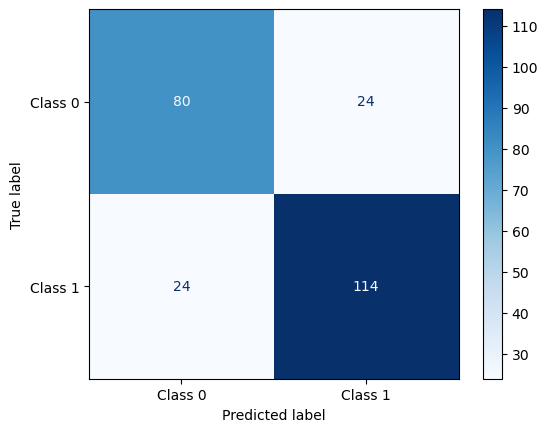

In [43]:
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)

plt.show()